In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
import os
import json

In [166]:
input_folder = 'Weather'
dataframes = []

for filename in os.listdir(input_folder):
    if filename.endswith('.xlsx'):
        input_file = os.path.join(input_folder, filename)
        try:
            data = pd.read_excel(input_file)
            dataframes.append(data)
        except Exception as e:
            print(f"Error loading {input_file}: {e}")

weather_df = pd.concat(dataframes, ignore_index=True)
print("All .xlsx files have been loaded and combined into one DataFrame.")

All .xlsx files have been loaded and combined into one DataFrame.


In [169]:
input_folder = "Weather"
dfs = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(folder_path, filename)
        workbook = load_workbook(file_path)
        sheet = workbook["Sheet1"]
        
        columns = [cell.value for cell in sheet[1]]
        data = [row for row in sheet.iter_rows(min_row=2, values_only=True)]
        
        df2 = pd.DataFrame(data, columns=columns)
        new_columns = ["Time", "Temperature (°F)", "Dew Point (°F)", "Humidity (%)", "Wind Speed (mph)", "Pressure (in)", "Precipitation (in)"]
        df2.columns = new_columns
        
        columns_to_split = ["Temperature (°F)", "Dew Point (°F)", "Humidity (%)", "Wind Speed (mph)", "Pressure (in)"]
        
        new_data = {}

        for col in columns_to_split:
            raw_data = df2[col][0].split()[3:]
            numeric_data = list(map(float, raw_data))
            grouped_data = [numeric_data[i:i+3] for i in range(0, len(numeric_data), 3)]
            new_data[f"{col} - Max"] = [row[0] for row in grouped_data]
            new_data[f"{col} - Avg"] = [row[1] for row in grouped_data]
            new_data[f"{col} - Min"] = [row[2] for row in grouped_data]
        
        new_df = pd.DataFrame(new_data)

        new_df.insert(0, "Date", range(1, len(new_df) + 1))
        new_df['Precipitation (in)'] = [0.00] * len(new_df)
        
        dfs[filename.split(".")[0]] = new_df
dfs['1']['Month'] = 7
dfs['1']['Year'] = 2023
dfs['2']['Month'] = 8
dfs['2']['Year'] = 2023
dfs['3']['Month'] = 9
dfs['3']['Year'] = 2023
dfs['4']['Month'] = 10
dfs['4']['Year'] = 2023
dfs['5']['Month'] = 11
dfs['5']['Year'] = 2023
dfs['6']['Month'] = 12
dfs['6']['Year'] = 2023
dfs['7']['Month'] = 1
dfs['7']['Year'] = 2023
dfs['8']['Month'] = 2
dfs['8']['Year'] = 2024
dfs['9']['Month'] = 3
dfs['9']['Year'] = 2024
dfs['10']['Month'] = 4
dfs['10']['Year'] = 2024
dfs['11']['Month'] = 5
dfs['11']['Year'] = 2024
dfs['12']['Month'] = 6
dfs['12']['Year'] = 2024
dfs['13']['Month'] = 7
dfs['13']['Year'] = 2024
weather_df = pd.concat([dfs[str(i)] for i in range(1, 14)], ignore_index=True)
columns_to_keep = ['Date', 'Temperature (°F) - Avg', 'Dew Point (°F) - Avg', 'Humidity (%) - Avg', 
                   'Wind Speed (mph) - Avg', 'Pressure (in) - Avg', 'Precipitation (in)', 'Month', 'Year']

weather_df = weather_df[columns_to_keep]
weather_df.columns = ['Day', 'Temperature', 'DewPoint', 'Humidity', 'WindSpeed', 'Pressure', 'Precipitation', 'Month', 'Year']
weather_df.to_csv('weather_df.csv', index=False)
weather_df

,Day,Temperature,DewPoint,Humidity,WindSpeed,Pressure,Precipitation,Month,Year
0,1,88.8,74.5,63.4,8.9,28.8,0.0,7,2023
1,2,91.5,75.8,61.3,6.7,28.8,0.0,7,2023
2,3,91.7,77.0,63.7,11.0,28.8,0.0,7,2023
3,4,88.5,74.3,64.0,13.0,28.7,0.0,7,2023
4,5,76.0,72.9,90.2,15.0,28.8,0.0,7,2023
...,...,...,...,...,...,...,...,...,...
375,10,88.2,76.7,69.8,8.6,28.9,0.0,7,2024
376,11,90.7,76.8,65.7,6.7,28.7,0.0,7,2024
377,12,79.4,74.9,85.5,14.0,28.7,0.0,7,2024
378,13,85.5,71.7,65.2,5.4,28.7,0.0,7,2024


In [31]:
weather_df.to_csv('weather_data.csv', index=False)
print("Combined weather data has been saved to 'weather_data.csv'.")

Combined weather data has been saved to 'weather_data.csv'.


In [74]:
input_folder = 'Train'
dataframes = {}

def docx_reading(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return ''.join(full_text)

def json_to_dataframe(doc_content):
    try:
        data = json.loads(doc_content)
        df = pd.json_normalize(data, sep='_')
        return df
    except Exception as e:
        print(f"Error converting to DataFrame: {e}")

for filename in os.listdir(input_folder):
    if filename.endswith('.docx'):
        input_file = os.path.join(input_folder, filename)
        try:
            doc_content = read_docx(input_file)
            df = json_to_dataframe(doc_content)
            dataframes[filename] = df
        except Exception as e:
            print(f"Error reading {input_file}: {e}")

print("All .docx files have been loaded into DataFrames.")

train_df = pd.concat(dataframes, ignore_index=True)
train_df

All .docx files have been loaded into DataFrames.


,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,arrival_gate,departure_gate,arrival_actualTime,arrival_estimatedRunway,arrival_actualRunway,ScheduledDeparture,ActualDeparture,DepartureDelay,Date,Hour
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,NaN,NaN,NaN,NaN,NaN,2023-07-20 20:50:00,2023-07-20 20:15:00,-35.0,2023-07-20,20
1,departure,active,lhe,opla,NaN,2023-07-18t15:05:00.000,2023-07-18t15:05:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-18 15:05:00,NaT,NaN,2023-07-18,15
2,departure,active,lhe,opla,NaN,2023-07-23t09:50:00.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-23 09:50:00,NaT,NaN,2023-07-23,9
3,departure,active,lhe,opla,m,2023-07-26t23:30:00.000,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,...,NaN,NaN,NaN,NaN,NaN,2023-07-26 23:30:00,2023-07-26 23:51:00,21.0,2023-07-26,23
4,departure,active,lhe,opla,m,2023-07-20t11:35:00.000,2023-07-20t17:15:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-20 11:35:00,NaT,NaN,2023-07-20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,lhe,opla,NaN,2023-11-16t09:50:00.000,2023-11-16t09:50:00.000,2023-11-16t10:03:00.000,2023-11-16t10:03:00.000,2023-11-16t10:03:00.000,...,NaN,NaN,NaN,NaN,NaN,2023-11-16 09:50:00,2023-11-16 10:03:00,13.0,2023-11-16,9
51568,departure,active,lhe,opla,m,2023-11-16t11:40:00.000,2023-11-16t11:40:00.000,2023-11-16t11:48:00.000,2023-11-16t11:48:00.000,2023-11-16t11:48:00.000,...,NaN,NaN,NaN,NaN,NaN,2023-11-16 11:40:00,2023-11-16 11:48:00,8.0,2023-11-16,11
51569,departure,active,lhe,opla,m,2023-11-27t10:50:00.000,2023-11-27t14:35:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-11-27 10:50:00,NaT,NaN,2023-11-27,10
51570,departure,active,lhe,opla,m,2023-11-19t02:00:00.000,2023-11-19t11:00:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-11-19 02:00:00,NaT,NaN,2023-11-19,2


In [30]:
train_df.to_csv('train_data.csv', index=False)
print("Combined train data has been saved to 'train_data.csv'.")

Combined train data has been saved to 'train_data.csv'.


In [76]:
testing_folder = 'Test'
dataframes = {}

def docx_reading(Document_file_path):
    doc_object = Document(Document_file_path)
    empty_text = []
    for text in doc_object.paragraphs:
        empty_text.append(text.text)
    return ''.join(empty_text)

def json_to_dataframe(data):
    df = json.loads(data)
    flat_data = pd.json_normalize(df)

    if 'arrival.estimatedTime' not in flat_data.columns:
        flat_data['arrival.estimatedTime'] = None
    if 'arrival.actualTime' not in flat_data.columns:
        flat_data['arrival.actualTime'] = None

    flat_data['arrival.estimatedTime'] = pd.to_datetime(flat_data['arrival.estimatedTime'], errors='coerce')
    flat_data['arrival.actualTime'] = pd.to_datetime(flat_data['arrival.actualTime'], errors='coerce')

    flat_data['ArrivalDelay'] = (flat_data['arrival.actualTime'] - flat_data['arrival.estimatedTime']).dt.total_seconds() / 60.0
    return flat_data

for name_of_file in os.listdir(testing_folder):
    if name_of_file.endswith('.docx'):
        docx_file_path = os.path.join(testing_folder, name_of_file)
        try:
            value = docx_reading(docx_file_path)
            df = json_to_dataframe(value)
            dataframes[name_of_file] = df
        except Exception as e:
            print(f"Error processing {docx_file_path}: {e}")

print("All files in the testing folder have been loaded into DataFrames.")
test_df = pd.concat(dataframes, ignore_index=True)
test_df

All files in the testing folder have been loaded into DataFrames.


,type,status,departure.iataCode,departure.icaoCode,departure.scheduledTime,departure.estimatedRunway,departure.actualRunway,arrival.iataCode,arrival.icaoCode,arrival.scheduledTime,...,codeshared.airline.icaoCode,codeshared.flight.number,codeshared.flight.iataNumber,codeshared.flight.icaoNumber,departure.gate,arrival.gate,arrival.actualTime,arrival.estimatedRunway,arrival.actualRunway,ArrivalDelay
0,departure,active,lhe,opla,2023-07-17t20:35:00.000,2023-07-17t20:46:00.000,2023-07-17t20:46:00.000,khi,opkc,2023-07-17t22:20:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,departure,active,lhe,opla,2023-07-27t08:00:00.000,NaN,NaN,ruh,oerk,2023-07-27t10:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,departure,active,lhe,opla,2023-07-27t08:00:00.000,NaN,NaN,dxb,omdb,2023-07-27t10:00:00.000,...,pia,203,pk203,pia203,NaN,NaN,NaT,NaN,NaN,NaN
3,departure,unknown,lhe,opla,2023-07-28t16:45:00.000,NaN,NaN,jed,oejn,2023-07-28t20:30:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,departure,active,lhe,opla,2023-07-19t04:15:00.000,2023-07-19t04:18:00.000,2023-07-19t04:18:00.000,auh,omaa,2023-07-19t06:35:00.000,...,etd,242,ey242,etd242,24,70,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,departure,active,lhe,opla,2023-11-23t23:15:00.000,2023-11-23t23:27:00.000,2023-11-23t23:27:00.000,shj,omsj,2023-11-24t02:05:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
14906,departure,active,lhe,opla,2023-11-25t18:45:00.000,2023-11-25t19:05:00.000,2023-11-25t19:05:00.000,jed,oejn,2023-11-25t22:05:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
14907,departure,active,lhe,opla,2023-11-25t02:55:00.000,2023-11-25t03:07:00.000,2023-11-25t03:07:00.000,doh,othh,2023-11-25t05:05:00.000,...,qtr,621,qr621,qtr621,NaN,NaN,NaT,NaN,NaN,NaN
14908,departure,active,lhe,opla,2023-11-27t08:35:00.000,NaN,NaN,doh,othh,2023-11-27t10:45:00.000,...,qtr,629,qr629,qtr629,NaN,NaN,NaT,NaN,NaN,NaN


In [56]:
test_df.to_csv('test_data.csv', index=False)
print("Combined train data has been saved to 'test_data.csv'.")

Combined train data has been saved to 'test_data.csv'.


In [4]:
def clean_weather_df(weather_df):
    if 'Time' not in weather_df.columns:
        raise ValueError("The 'Time' column is missing from the weather data.")
    
    weather_df[['Month', 'Rest']] = weather_df['Time'].str.split(' ', n=1, expand=True)
    weather_df['Date'] = weather_df['Month'] + ' 1'
    weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%b %d', errors='coerce')
    weather_df['Hour'] = weather_df['Rest'].str.extract(r'(\d+)').astype(float, errors='ignore')
    
    weather_df.rename(columns={
        'Temperature (°F)': 'Temperature',
        'Dew Point (°F)': 'DewPoint',
        'Humidity (%)': 'Humidity',
        'Wind Speed (mph)': 'WindSpeed',
        'Pressure (in)': 'Pressure',
        'Precipitation (in)': 'Precipitation'
    }, inplace=True)
    
    weather_df.dropna(subset=['Date', 'Hour'], inplace=True)
    return weather_df

def replace_nan_with_mean_or_mode(test_dataframe):
    for col in test_dataframe.columns:
        if test_dataframe[col].dtype == 'object':
            mode_series = test_dataframe[col].mode()
            if not mode_series.empty:
                mode_value = mode_series[0]
                test_dataframe[col].fillna(mode_value, inplace=True)
        else:
            mean_value = test_dataframe[col].mean()
            test_dataframe[col].fillna(mean_value, inplace=True)
    return test_dataframe    

def clean_train_df(train_df, weather_df):
    required_columns = ['departure_scheduledTime', 'departure_actualTime']
    for col in required_columns:
        if col not in train_df.columns:
            raise ValueError(f"'{col}' column is missing from the training data.")
    
    train_df['ScheduledDeparture'] = pd.to_datetime(train_df['departure_scheduledTime'], errors='coerce')
    train_df['ActualDeparture'] = pd.to_datetime(train_df['departure_actualTime'], errors='coerce')
    train_df['DepartureDelay'] = (train_df['ActualDeparture'] - train_df['ScheduledDeparture']).dt.total_seconds() / 60.0
    
    train_df['Date'] = train_df['ScheduledDeparture'].dt.date
    train_df['Hour'] = train_df['ScheduledDeparture'].dt.hour
    weather_df['Date'] = weather_df['Date'].dt.date
    
    merged_data = pd.merge(train_df, weather_df, on=['Date', 'Hour'], how='left')
    merged_data['DayOfWeek'] = merged_data['ScheduledDeparture'].dt.day_name()
    merged_data['Month'] = merged_data['ScheduledDeparture'].dt.month
    merged_data['Day'] = merged_data['ScheduledDeparture'].dt.day
    
    columns_to_drop = ['departure_scheduledTime', 'departure_actualTime']
    merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns], errors='ignore', inplace=True)
    
    return merged_data


train_df = pd.read_csv('train_data.csv')
weather_df = pd.read_csv('weather_data.csv')

print("PreProcessing weather dataframe...")
weather_df = clean_weather_df(weather_df)
print("PreProcessing training dataframe...")
processed_df = clean_train_df(train_df, weather_df)
train_data = processed_df
weather_df = pd.read_csv('weather_df.csv')
train_data['departure_estimatedTime'] = pd.to_datetime(train_data['departure_estimatedTime'], errors='coerce')
train_data['Year'] = train_data['departure_estimatedTime'].dt.year
for idx, row in train_data.iterrows():
    day = row['Day']
    month = row['Month']
    year = row['Year']
    
    matching_row = weather_df[(weather_df['Day'] == day) & 
                              (weather_df['Month'] == month) & 
                              (weather_df['Year'] == year)]
    
    if not matching_row.empty:
        train_data.at[idx, 'Temperature'] = matching_row['Temperature'].values[0]
        train_data.at[idx, 'DewPoint'] = matching_row['DewPoint'].values[0]
        train_data.at[idx, 'Humidity'] = matching_row['Humidity'].values[0]
        train_data.at[idx, 'WindSpeed'] = matching_row['WindSpeed'].values[0]
        train_data.at[idx, 'Pressure'] = matching_row['Pressure'].values[0]
        train_data.at[idx, 'Precipitation'] = matching_row['Precipitation'].values[0]
        
processed_df = train_data 
processed_df = replace_nan_with_mean_or_mode(processed_df)
processed_df = processed_df.drop(columns=['Rest'])

print("Saving Processed training data...")
processed_df.to_csv("preprocessed_train.csv", index=False)
print("Phase 1 data PreProcessing completed successfully!")

PreProcessing weather dataframe...
PreProcessing training dataframe...
Saving Processed training data...
Phase 1 data PreProcessing completed successfully!


In [5]:
processed_df

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_estimatedTime,departure_estimatedRunway,departure_actualRunway,arrival_iataCode,arrival_icaoCode,...,Temperature,DewPoint,Humidity,WindSpeed,Pressure,Precipitation,Month,DayOfWeek,Day,Year
0,departure,active,lhe,opla,m,2023-07-20 20:00:00.000000000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,ruh,oerk,...,88.2,79.8,76.0,5.3,28.8,0.0,7,Thursday,20,2023.000000
1,departure,active,lhe,opla,m,2023-07-18 15:05:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,khi,opkc,...,89.4,80.1,73.8,10.2,28.8,0.0,7,Tuesday,18,2023.000000
2,departure,active,lhe,opla,m,2024-01-07 02:09:41.853921024,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,khi,opkc,...,91.6,77.1,64.7,5.2,28.9,0.0,7,Sunday,23,2023.509368
3,departure,active,lhe,opla,m,2023-07-26 23:30:00.000000000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,kwi,okkk,...,86.9,78.9,77.4,8.1,28.9,0.0,7,Wednesday,26,2023.000000
4,departure,active,lhe,opla,m,2023-07-20 17:15:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,dxb,omdb,...,88.2,79.8,76.0,5.3,28.8,0.0,7,Thursday,20,2023.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,lhe,opla,m,2023-11-16 09:50:00.000000000,2023-11-16t10:03:00.000,2023-11-16t10:03:00.000,khi,opkc,...,67.5,54.8,65.5,0.8,29.3,0.0,11,Thursday,16,2023.000000
51568,departure,active,lhe,opla,m,2023-11-16 11:40:00.000000000,2023-11-16t11:48:00.000,2023-11-16t11:48:00.000,jed,oejn,...,67.5,54.8,65.5,0.8,29.3,0.0,11,Thursday,16,2023.000000
51569,departure,active,lhe,opla,m,2023-11-27 14:35:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,dxb,omdb,...,62.7,54.3,74.4,2.3,29.3,0.0,11,Monday,27,2023.000000
51570,departure,active,lhe,opla,m,2023-11-19 11:00:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,kul,wmkk,...,67.8,55.0,66.3,1.5,28.7,0.0,11,Sunday,19,2023.000000


Starting Exploratory Data Analysis (EDA)...


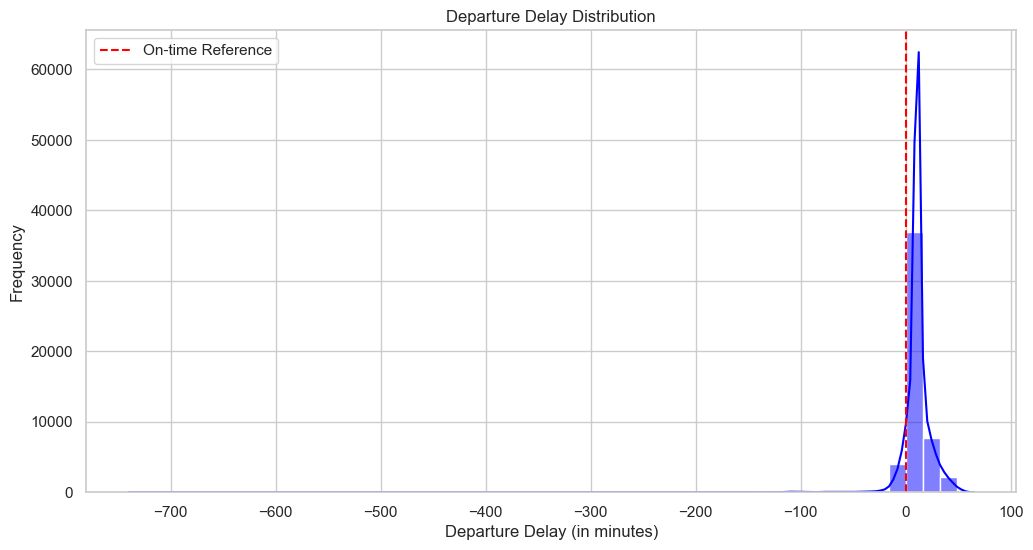

In [5]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def visualize_delay_distribution(data):
    plt.figure()
    sns.histplot(data['DepartureDelay'], bins=50, kde=True, color="blue")
    plt.title("Departure Delay Distribution")
    plt.xlabel("Departure Delay (in minutes)")
    plt.ylabel("Frequency")
    plt.axvline(x=0, color="red", linestyle="--", label="On-time Reference")
    plt.legend()
    plt.show()

def visualize_temporal_trends(data):
    plt.figure()
    sns.boxplot(x="DayOfWeek", y="DepartureDelay", data=data, palette="coolwarm", order=[
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title("Departure Delays by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Departure Delay (in minutes)")
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure()
    sns.lineplot(x="Hour", y="DepartureDelay", data=data.groupby("Hour")["DepartureDelay"].mean().reset_index(), color="green")
    plt.title("Average Departure Delays by Hour of the Day")
    plt.xlabel("Hour")
    plt.ylabel("Average Delay (in minutes)")
    plt.xticks(range(0, 24))
    plt.show()

def visualize_category_delays(data):
    plt.figure()
    sns.boxplot(x="airline_name", y="DepartureDelay", data=data, palette="pastel")
    plt.title("Departure Delays by Airline")
    plt.xlabel("Airline")
    plt.ylabel("Departure Delay (in minutes)")
    plt.xticks(rotation=90)
    plt.show()

    plt.figure()
    sns.boxplot(x="departure_terminal", y="DepartureDelay", data=data, palette="muted")
    plt.title("Departure Delays by Terminal")
    plt.xlabel("Terminal")
    plt.ylabel("Departure Delay (in minutes)")
    plt.show()

def visualize_correlation(data):
    plt.figure()
    numerical_columns = ['Temperature', 'DewPoint', 'Humidity', 'WindSpeed', 'Pressure', 'Precipitation', 'DepartureDelay']
    correlation_matrix = data[numerical_columns].corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix: Weather and Delays")
    plt.show()

def compare_train_test_delays(train_data, test_data):
    plt.figure()
    sns.kdeplot(train_data['DepartureDelay'], label="Train Data", shade=True)
    sns.kdeplot(test_data['DepartureDelay'], label="Test Data", shade=True, color="orange")
    plt.title("Departure Delay Distribution: Train vs Test")
    plt.xlabel("Departure Delay (in minutes)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

print("Starting Exploratory Data Analysis (EDA)...")
visualize_delay_distribution(processed_df)

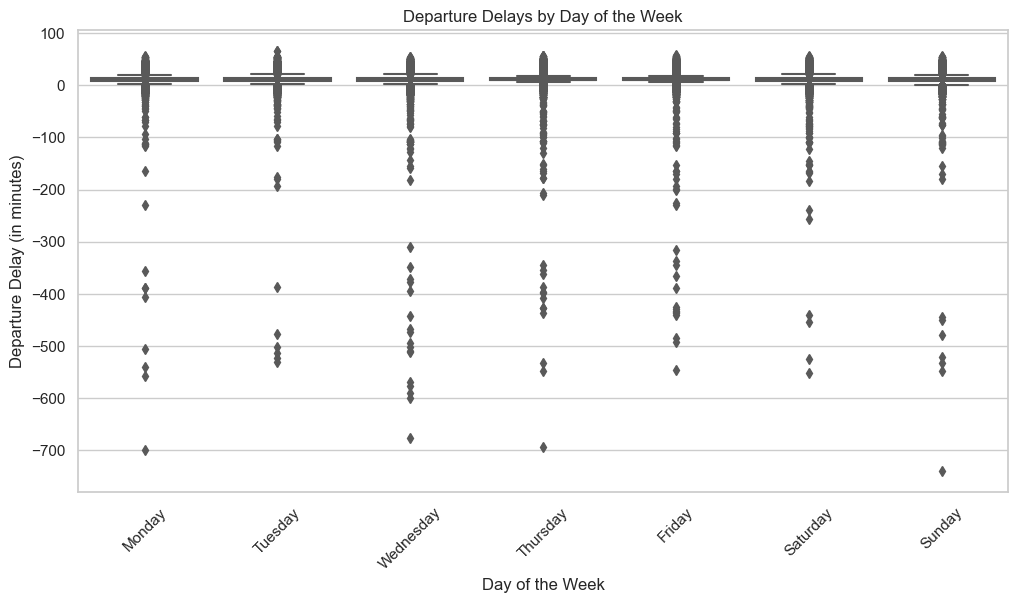

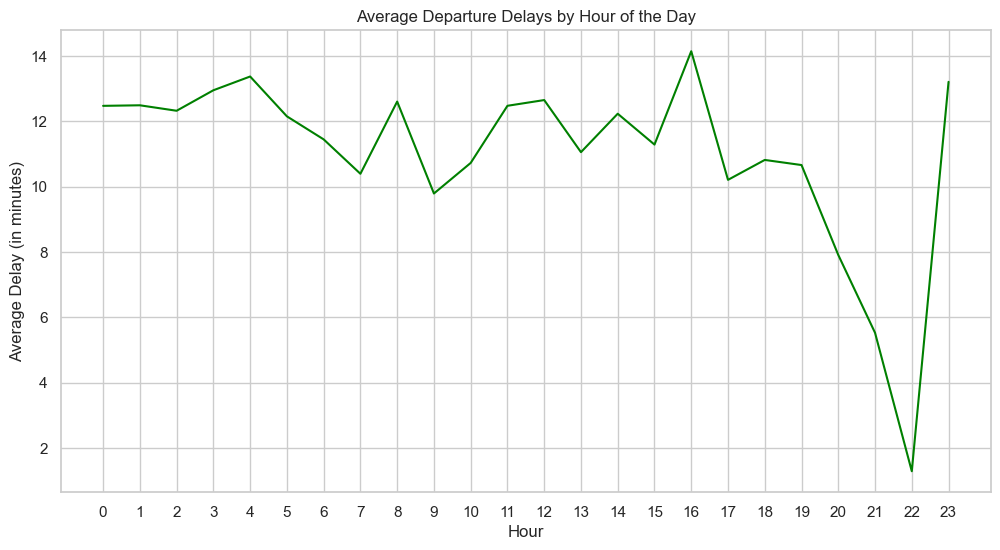

In [6]:
visualize_temporal_trends(processed_df)

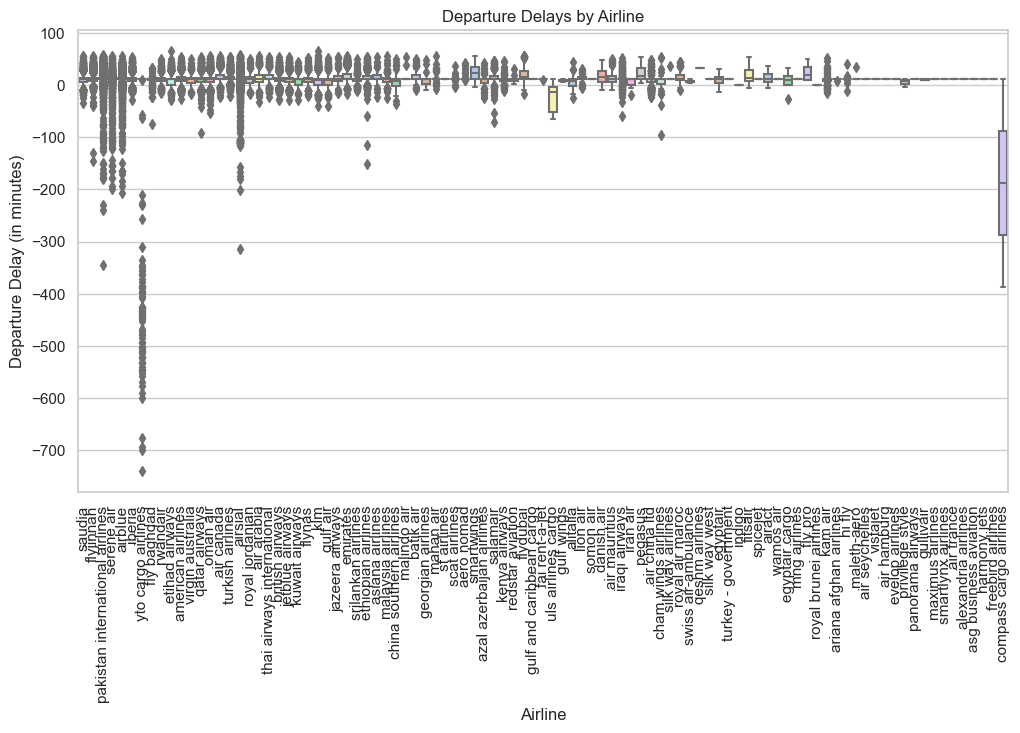

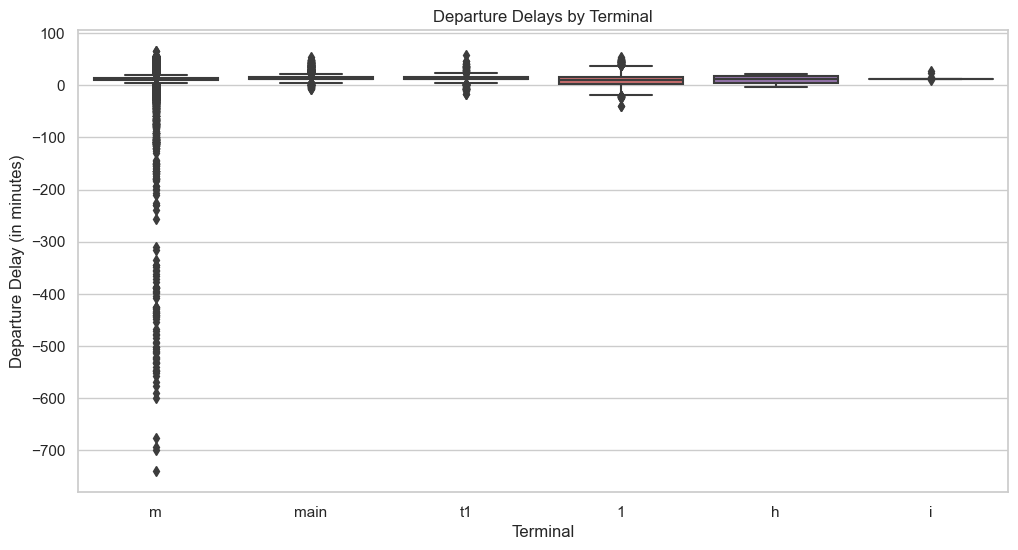

In [7]:
visualize_category_delays(processed_df)

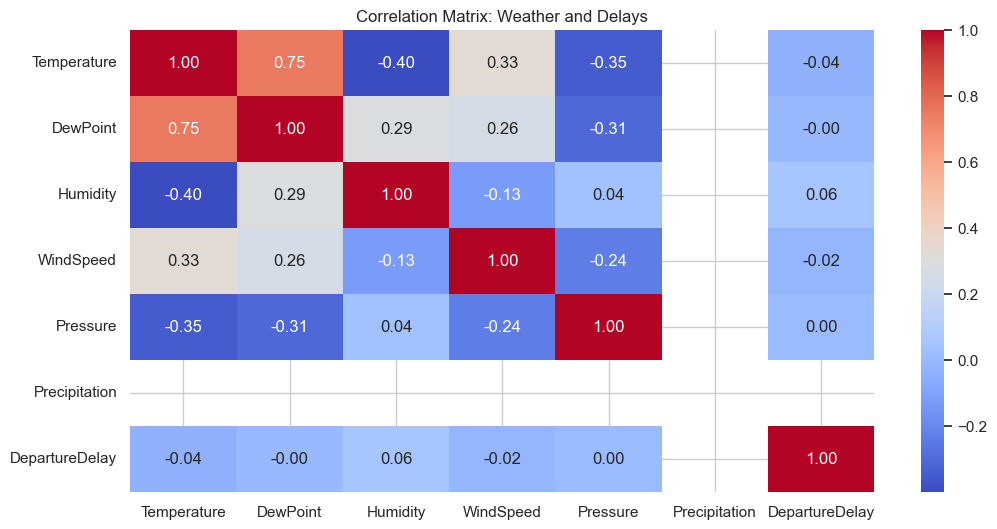

Exploratory Data Analysis (EDA) completed successfully!


In [8]:
visualize_correlation(processed_df)
print("Exploratory Data Analysis (EDA) completed successfully!")

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import joblib

In [10]:
dataset = pd.read_csv('preprocessed_train.csv')

if 'ScheduledDeparture' not in dataset.columns:
    dataset['ScheduledDeparture'] = pd.to_datetime(dataset['ScheduledDeparture'], errors='coerce')

if 'DayOfWeek' not in dataset.columns:
    dataset['DayOfWeek'] = dataset['ScheduledDeparture'].dt.day_name()

if 'Hour' not in dataset.columns:
    dataset['Hour'] = dataset['ScheduledDeparture'].dt.hour

if 'Month' not in dataset.columns:
    dataset['Month'] = dataset['ScheduledDeparture'].dt.month

weather_columns = ['Temperature', 'Humidity', 'WindSpeed', 'Pressure']
for col in weather_columns:
    if col not in dataset.columns:
        raise KeyError(f"Weather feature '{col}' is missing. Ensure weather data was merged correctly.")

def categorize_delay(delay):
    if delay == 0:
        return "No Delay"
    elif delay < 45:
        return "Short Delay"
    elif delay <= 175:
        return "Moderate Delay"
    else:
        return "Long Delay"

dataset['BinaryDelay'] = dataset['DepartureDelay'].apply(lambda delay: 1 if delay > 0 else 0)
dataset['DelayCategory'] = dataset['DepartureDelay'].apply(categorize_delay)

dataset = pd.get_dummies(dataset, columns=['DayOfWeek'], drop_first=True)

day_of_week_cols = [col for col in dataset.columns if col.startswith('DayOfWeek_')]
features = weather_columns + ['Hour', 'Month'] + day_of_week_cols

X_features = dataset[features].daropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')
X_imputed_data = imputer.fit_transform(X_features)
X_features = pd.DataFrame(X_imputed_data, columns=X_features.columns)

y_binary_target = dataset['BinaryDelay']
y_multiclass_target = dataset['DelayCategory']
y_regression_target = dataset['DepartureDelay']

if y_regression_target.isnull().sum() > 0:
    valid_rows = ~y_regression_target.isnull()
    X_features = X_features[valid_rows]
    y_binary_target = y_binary_target[valid_rows]
    y_multiclass_target = y_multiclass_target[valid_rows]
    y_regression_target = y_regression_target[valid_rows]

X_train_set, X_test_set, y_train_binary_set, y_test_binary_set = train_test_split(X_features, y_binary_target, test_size=0.2, random_state=42)
_, _, y_train_multiclass_set, y_test_multiclass_set = train_test_split(X_features, y_multiclass_target, test_size=0.2, random_state=42)
X_train_reg_set, X_test_reg_set, y_train_regression_set, y_test_regression_set = train_test_split(X_features, y_regression_target, test_size=0.2, random_state=42)

binary_model = RandomForestClassifier(random_state=42)
binary_model.fit(X_train_set, y_train_binary_set)
y_pred_binary_set = binary_model.predict(X_test_set)

print(f"Accuracy: {accuracy_score(y_test_binary_set, y_pred_binary_set):.2f}")
print(f"Precision: {precision_score(y_test_binary_set, y_pred_binary_set):.2f}")
print(f"Recall: {recall_score(y_test_binary_set, y_pred_binary_set):.2f}")
print(f"F1 Score: {f1_score(y_test_binary_set, y_pred_binary_set):.2f}")
print(confusion_matrix(y_test_binary_set, y_pred_binary_set))

multi_class_model = RandomForestClassifier(random_state=42)
multi_class_model.fit(X_train_set, y_train_multiclass_set)
y_pred_multiclass_set = multi_class_model.predict(X_test_set)

print(classification_report(y_test_multiclass_set, y_pred_multiclass_set))

regression_model = RandomForestRegressor(random_state=42)
regression_model.fit(X_train_reg_set, y_train_regression_set)
y_pred_regression_set = regression_model.predict(X_test_reg_set)

print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_regression_set, y_pred_regression_set):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test_regression_set, y_pred_regression_set)):.2f}")

joblib.dump(binary_model, "binary_rf_model.pkl")
joblib.dump(multi_class_model, "multi_class_rf_model.pkl")
joblib.dump(regression_model, "rf_regressor_model.pkl")

print("Phase 3: Model Training and Evaluation Completed!")

Accuracy: 0.90
Precision: 0.93
Recall: 0.97
F1 Score: 0.95
[[ 194  734]
 [ 290 9097]]
                precision    recall  f1-score   support

Moderate Delay       0.17      0.07      0.09        92
      No Delay       0.33      0.08      0.12       119
   Short Delay       0.98      1.00      0.99     10104

      accuracy                           0.98     10315
     macro avg       0.50      0.38      0.40     10315
  weighted avg       0.97      0.98      0.97     10315

Mean Absolute Error (MAE): 8.43
Root Mean Squared Error (RMSE): 21.62
Phase 3: Model Training and Evaluation Completed!


In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score

binary_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

binary_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=binary_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)
binary_grid_search.fit(X_train_set, y_train_binary_set)
print(f"Best Parameters for Binary Classification: {binary_grid_search.best_params_}")
binary_best_model = binary_grid_search.best_estimator_

binary_cv_scores = cross_val_score(binary_best_model, X_features, y_binary_target, cv=5, scoring='accuracy')
print(f"Binary Classification Cross-Validation Scores: {binary_cv_scores}")
print(f"Mean Accuracy: {np.mean(binary_cv_scores):.2f}")

multi_class_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

multi_class_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=multi_class_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)
multi_class_grid_search.fit(X_train_set, y_train_multiclass_set)
print(f"Best Parameters for Multi-Class Classification: {multi_class_grid_search.best_params_}")
multi_class_best_model = multi_class_grid_search.best_estimator_

multi_class_cv_scores = cross_val_score(multi_class_best_model, X_features, y_multiclass_target, cv=5, scoring='accuracy')
print(f"Multi-Class Classification Cross-Validation Scores: {multi_class_cv_scores}")
print(f"Mean Accuracy: {np.mean(multi_class_cv_scores):.2f}")

regression_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

regression_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=regression_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)
regression_grid_search.fit(X_train_reg_set, y_train_regression_set)
print(f"Best Parameters for Regression: {regression_grid_search.best_params_}")
regression_best_model = regression_grid_search.best_estimator_

regression_cv_scores = cross_val_score(regression_best_model, X_features, y_regression_target, cv=5, scoring='neg_mean_squared_error')
print(f"Regression Cross-Validation Scores: {regression_cv_scores}")
print(f"Mean RMSE: {np.sqrt(-np.mean(regression_cv_scores)):.2f}")

print("Comparing Models:")
print(f"Binary Classification - Mean Accuracy: {np.mean(binary_cv_scores):.2f}")
print(f"Multi-Class Classification - Mean Accuracy: {np.mean(multi_class_cv_scores):.2f}")
print(f"Regression - Mean RMSE: {np.sqrt(-np.mean(regression_cv_scores)):.2f}")

joblib.dump(binary_best_model, "optimized_binary_rf_model.pkl")
joblib.dump(multi_class_best_model, "optimized_multi_class_rf_model.pkl")
joblib.dump(regression_best_model, "optimized_rf_regressor_model.pkl")

print("Phase 4: Model Optimization and Evaluation Completed!")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Binary Classification: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Binary Classification Cross-Validation Scores: [0.90877363 0.91090645 0.90963739 0.91118868 0.90382005]
Mean Accuracy: 0.91
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Multi-Class Classification: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Multi-Class Classification Cross-Validation Scores: [0.97867184 0.97741154 0.9783789  0.97731239 0.97866977]
Mean Accuracy: 0.98
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Regression: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Regression Cross-Validation Scores: [-1051.99061251  -203.10228227  -853.31946265  -276.14844912
  -216.86428389]
Mean RMSE: 22.81
Comparing Models:
Binary Classification - Mea

In [14]:
test_dataframe = pd.read_csv('test_data.csv')
column_mapping = {
    'type': 'type',
    'status': 'status',
    'departure.iataCode': 'departure_iataCode',
    'departure.icaoCode': 'departure_icaoCode',
    'departure.scheduledTime': 'departure_scheduledTime',
    'departure.estimatedRunway': 'departure_estimatedTime',
    'departure.actualRunway': 'departure_actualTime',
    'arrival.iataCode': 'arrival_iataCode',
    'arrival.icaoCode': 'arrival_icaoCode',
    'arrival.scheduledTime': 'arrival_scheduledTime',
    'arrival.estimatedTime': 'arrival_estimatedTime',
    'airline.name': 'airline_name',
    'airline.iataCode': 'airline_iataCode',
    'airline.icaoCode': 'airline_icaoCode',
    'flight.number': 'flight_number',
    'flight.iataNumber': 'flight_iataNumber',
    'flight.icaoNumber': 'flight_icaoNumber',
    'departure.terminal': 'departure_terminal',
    'arrival.terminal': 'arrival_terminal',
    'arrival.baggage': 'arrival_baggage',
    'codeshared.airline.name': 'codeshared_airline_name',
    'codeshared.airline.iataCode': 'codeshared_airline_iataCode',
    'codeshared.airline.icaoCode': 'codeshared_airline_icaoCode',
    'codeshared.flight.number': 'codeshared_flight_number',
    'codeshared.flight.iataNumber': 'codeshared_flight_iataNumber',
    'codeshared.flight.icaoNumber': 'codeshared_flight_icaoNumber',
    'departure.gate': 'departure_gate',
    'arrival.gate': 'arrival_gate',
    'arrival.actualTime': 'arrival_actualTime',
    'arrival.estimatedRunway': 'arrival_estimatedRunway',
    'arrival.actualRunway': 'arrival_actualRunway',
    'ArrivalDelay': 'ArrivalDelay'
}
test_dataframe.rename(columns=column_mapping, inplace=True)
test_dataframe

,type,status,departure_iataCode,departure_icaoCode,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_iataCode,arrival_icaoCode,arrival_scheduledTime,...,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_iataNumber,codeshared_flight_icaoNumber,departure_gate,arrival_gate,arrival_actualTime,arrival_estimatedRunway,arrival_actualRunway,ArrivalDelay
0,departure,active,lhe,opla,2023-07-17t20:35:00.000,2023-07-17t20:46:00.000,2023-07-17t20:46:00.000,khi,opkc,2023-07-17t22:20:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,2023-07-27t08:00:00.000,NaN,NaN,ruh,oerk,2023-07-27t10:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,2023-07-27t08:00:00.000,NaN,NaN,dxb,omdb,2023-07-27t10:00:00.000,...,pia,203.0,pk203,pia203,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,unknown,lhe,opla,2023-07-28t16:45:00.000,NaN,NaN,jed,oejn,2023-07-28t20:30:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,2023-07-19t04:15:00.000,2023-07-19t04:18:00.000,2023-07-19t04:18:00.000,auh,omaa,2023-07-19t06:35:00.000,...,etd,242.0,ey242,etd242,24,70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,departure,active,lhe,opla,2023-11-23t23:15:00.000,2023-11-23t23:27:00.000,2023-11-23t23:27:00.000,shj,omsj,2023-11-24t02:05:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14906,departure,active,lhe,opla,2023-11-25t18:45:00.000,2023-11-25t19:05:00.000,2023-11-25t19:05:00.000,jed,oejn,2023-11-25t22:05:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14907,departure,active,lhe,opla,2023-11-25t02:55:00.000,2023-11-25t03:07:00.000,2023-11-25t03:07:00.000,doh,othh,2023-11-25t05:05:00.000,...,qtr,621.0,qr621,qtr621,NaN,NaN,NaN,NaN,NaN,NaN
14908,departure,active,lhe,opla,2023-11-27t08:35:00.000,NaN,NaN,doh,othh,2023-11-27t10:45:00.000,...,qtr,629.0,qr629,qtr629,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def clean_test_df(train_df, weather_df):
    required_columns = ['departure_scheduledTime', 'departure_actualTime']
    for col in required_columns:
        if col not in train_df.columns:
            raise ValueError(f"'{col}' column is missing from the training data.")
    
    train_df['ScheduledDeparture'] = pd.to_datetime(train_df['departure_scheduledTime'], errors='coerce')
    train_df['ActualDeparture'] = pd.to_datetime(train_df['departure_actualTime'], errors='coerce')
    train_df['DepartureDelay'] = (train_df['ActualDeparture'] - train_df['ScheduledDeparture']).dt.total_seconds() / 60.0
    
    train_df['Date'] = train_df['ScheduledDeparture'].dt.date
    train_df['Hour'] = train_df['ScheduledDeparture'].dt.hour
    weather_df['Date'] = weather_df['Date'].dt.date
    
    merged_data = pd.merge(train_df, weather_df, on=['Date', 'Hour'], how='left')
    merged_data['DayOfWeek'] = merged_data['ScheduledDeparture'].dt.day_name()
    merged_data['Month'] = merged_data['ScheduledDeparture'].dt.month
    merged_data['Day'] = merged_data['ScheduledDeparture'].dt.day

    return merged_data

weather_df = pd.read_csv('weather_data.csv')

print("PreProcessing weather dataframe...")
weather_df = clean_weather_df(weather_df)
print("PreProcessing test dataframe...")
processed_test_df = clean_test_df(test_dataframe, weather_df)

test_data = processed_test_df
weather_df = pd.read_csv('weather_df.csv')
test_data['departure_estimatedTime'] = pd.to_datetime(test_data['departure_estimatedTime'], errors='coerce')
test_data['Year'] = test_data['departure_estimatedTime'].dt.year
for idx, row in test_data.iterrows():
    day = row['Day']
    month = row['Month']
    year = row['Year']
    
    matching_row = weather_df[(weather_df['Day'] == day) & 
                              (weather_df['Month'] == month) & 
                              (weather_df['Year'] == year)]
    
    if not matching_row.empty:
        test_data.at[idx, 'Temperature'] = matching_row['Temperature'].values[0]
        test_data.at[idx, 'DewPoint'] = matching_row['DewPoint'].values[0]
        test_data.at[idx, 'Humidity'] = matching_row['Humidity'].values[0]
        test_data.at[idx, 'WindSpeed'] = matching_row['WindSpeed'].values[0]
        test_data.at[idx, 'Pressure'] = matching_row['Pressure'].values[0]
        test_data.at[idx, 'Precipitation'] = matching_row['Precipitation'].values[0]
    
processed_test_df = test_data 
processed_test_df = replace_nan_with_mean_or_mode(processed_test_df)

print("Saving Processed test data...")
processed_test_df.to_csv("preprocessed_test.csv", index=False)

PreProcessing weather dataframe...
PreProcessing test dataframe...
Saving Processed test data...


In [14]:
processed_test_df = processed_test_df.head(12914)
test_set = processed_test_df
if 'ScheduledDeparture' not in test_set.columns:
    test_set['ScheduledDeparture'] = pd.to_datetime(test_set['ScheduledDeparture'], errors='coerce')

if 'DayOfWeek' not in test_set.columns:
    test_set['DayOfWeek'] = test_set['ScheduledDeparture'].dt.day_name()

if 'Hour' not in test_set.columns:
    test_set['Hour'] = test_set['ScheduledDeparture'].dt.hour

if 'Month' not in test_set.columns:
    test_set['Month'] = test_set['ScheduledDeparture'].dt.month

test_set = pd.get_dummies(test_set, columns=['DayOfWeek'], drop_first=True)

weather_columns = ['Temperature', 'Humidity', 'WindSpeed', 'Pressure']
day_of_week_columns = [col for col in test_set.columns if col.startswith('DayOfWeek_')]
selected_features = weather_columns + ['Hour', 'Month'] + day_of_week_columns

test_features = test_set[selected_features].dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')
test_features_imputed = imputer.fit_transform(test_features)
test_features = pd.DataFrame(test_features_imputed, columns=test_features.columns)

binary_model = joblib.load("binary_rf_model.pkl")
multi_class_model = joblib.load("multi_class_rf_model.pkl")
regression_model = joblib.load("rf_regressor_model.pkl")

binary_results = binary_model.predict(test_features)
multi_class_results = multi_class_model.predict(test_features)
regression_results = regression_model.predict(test_features)

if 'FlightNumber' not in test_set.columns:
    print("FlightNumber column missing. Generating a dummy identifier.")
    test_set['FlightNumber'] = range(1, len(test_set) + 1)

binary_output = pd.DataFrame({
    'ID': test_set['FlightNumber'],
    'Delay': binary_results
})
binary_output['Delay'] = binary_output['Delay'].replace({1: 'on-time', 0: 'delayed'})
binary_output.to_csv("binary_output.csv", index=False)
print("Binary results saved as binary_output.csv.")

multi_class_output = pd.DataFrame({
    'ID': test_set['FlightNumber'],
    'Delay': multi_class_results
})
multi_class_output.to_csv("multi_class_output.csv", index=False)
print("Multi-class results saved as multi_class_output.csv.")

regression_output = pd.DataFrame({
    'ID': test_set['FlightNumber'],
    'Delay': regression_results
})
regression_output.to_csv("regression_output.csv", index=False)
print("Regression results saved as regression_output.csv.")
print("Phase 5: Model Testing Completed! ")

FlightNumber column missing. Generating a dummy identifier.
Binary results saved as binary_output.csv.
Multi-class results saved as multi_class_output.csv.
Regression results saved as regression_output.csv.
Phase 5: Model Testing Completed! 
